<a href="https://colab.research.google.com/github/Piyushvishnoi/Python_Pandas_Project/blob/main/Final_project_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Step 1: Install required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Download the Chipotle dataset
data_read = pd.read_csv("/chipotle.tsv", sep="\t")
data=pd.DataFrame(data_read)

In [7]:
# Step 3: Display basic information
print(" First 5 Rows of Dataset:")
display(data.head())

print("\n Dataset Summary:")
print(data.info())

print("\n Dataset Shape (Rows, Columns):", data.shape)

 First 5 Rows of Dataset:


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98



 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None

 Dataset Shape (Rows, Columns): (4622, 5)


In [8]:
# Step 4: Basic Data Analysis
print("\n🔹 Summary Statistics for Numerical Columns:")
print(data.describe())

print("\n🔹 Unique Items Ordered:")
print(data["item_name"].nunique())

print("\n🔹 Most Ordered Items:")
print(data["item_name"].value_counts().head(10))


🔹 Summary Statistics for Numerical Columns:
          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000

🔹 Unique Items Ordered:
50

🔹 Most Ordered Items:
item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64


In [12]:
# Step 5: Convert item_price column to float for analysis
#data["item_price"] = data["item_price"].str.replace("$", "").astype(float)    #to replace dollar sign with no space
print(data.info())
print("\n🔹 Average Item Price:", data["item_price"].mean())
print("\n🔹 Most Expensive Item Ordered:")
#The idmax() function in pandas is used to find the index of the first occurrence of the maximum value in a Series or DataFrame.
print(data.loc[data["item_price"].idxmax()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB
None

🔹 Average Item Price: 7.464335785374297

🔹 Most Expensive Item Ordered:
order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
Name: 3598, dtype: object


In [13]:
# Step 6: Sorting and Filtering
print("\n🔹 Top 5 Most Expensive Orders:")
display(data.sort_values(by="item_price", ascending=False).head())

print("\n🔹 Orders with Quantity More Than 2:")
display(data[data["quantity"] > 2].head())


🔹 Top 5 Most Expensive Orders:


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75



🔹 Orders with Quantity More Than 2:


,order_id,quantity,item_name,choice_description,item_price
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20
689,284,3,Canned Soft Drink,[Diet Coke],3.75
818,338,3,Bottled Water,NaN,3.27
850,350,3,Canned Soft Drink,[Sprite],3.75


In [14]:
# Step 7: Dropping a Column (Example)
data_cleaned = data.drop(columns=["choice_description"])
print("\n🔹 Columns after dropping 'choice_description':", data_cleaned.columns)


🔹 Columns after dropping 'choice_description': Index(['order_id', 'quantity', 'item_name', 'item_price'], dtype='object')


In [15]:
# Step 8: Save the cleaned dataset (optional)
data_cleaned.to_csv("chipotle_cleaned.csv", index=False)

In [16]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [18]:
#to check how many null values in a column
data.isnull().sum()

,0
order_id,0
quantity,0
item_name,0
choice_description,1246
item_price,0


In [19]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)

# Create a copy to avoid modifying the original data
data_copy = data.copy()

# Fill NA values in the copied dataset
data_copy.fillna('NA', inplace=True)
# Display processed data
print(data_copy.head())

Null values in each column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                 NA        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                 NA        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


In [21]:
# Example of concatenation (modify as needed)
# Assuming there are at least two columns to concatenate
if data_copy.shape[1] > 1:
    data_copy['concatenated'] = data_copy.iloc[:, 0].astype(str) + ' ' + data_copy.iloc[:, 1].astype(str)  # Selecting first two columns, converting to string, and concatenating with a space

# Display processed data
print(data_copy.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price concatenated  
0                                                 NA        2.39          1 1  
1                                       [Clementine]        3.39          1 1  
2                                            [Apple]        3.39          1 1  
3                                                 NA        2.39          1 1  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98          2 2  


In [ ]:
data_copy.tail()

,order_id,quantity,item_name,choice_description,item_price,concatenated
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,1833 1
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,1833 1
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,1834 1
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,1834 1
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,1834 1


In [ ]:
data_copy.fillna(0,inplace=False)  #to have value 0 in place of NaN values

,order_id,quantity,item_name,choice_description,item_price,concatenated
0,1,1,Chips and Fresh Tomato Salsa,NA,$2.39,1 1
1,1,1,Izze,[Clementine],$3.39,1 1
2,1,1,Nantucket Nectar,[Apple],$3.39,1 1
3,1,1,Chips and Tomatillo-Green Chili Salsa,NA,$2.39,1 1
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,2 2
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,1833 1
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,1833 1
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,1834 1
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,1834 1


In [23]:
data_copy.item_price.mean()
#data_copy.item_price
#item_price_mean=data_copy.item_price.mean()
#print(item_price_mean)

7.464335785374297

In [ ]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
# Step 1: Remove the dollar sign and strip extra spaces
data_copy['item_price'] = data_copy['item_price'].str.replace('$', '', regex=False).str.strip()

# Step 2: Convert to float
data_copy['item_price'] = data_copy['item_price'].astype(float)

# Check the result
print(data_copy)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                    NA        2.39  
1                                          [Clementine]

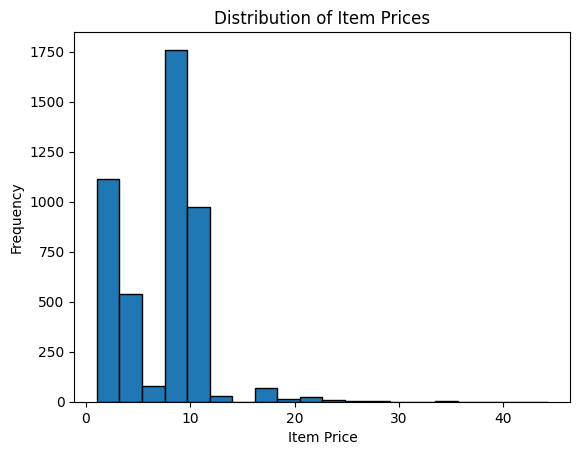

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
data_copy['item_price'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Distribution of Item Prices')
plt.show()

In [ ]:
#Filter rows where quantity > 2:
filtered_data = data_copy[data_copy['quantity'] > 2]
print("Orders with Quantity > 2:")
display(filtered_data.head())

Orders with Quantity > 2:


,order_id,quantity,item_name,item_price
409,178,3,Chicken Bowl,32.94
445,193,3,Bowl,22.20
689,284,3,Canned Soft Drink,3.75
818,338,3,Bottled Water,3.27
850,350,3,Canned Soft Drink,3.75


In [ ]:
#Drop the choice_description column:
data_copy = data_copy.drop(columns=['choice_description'])
print("Columns after dropping 'choice_description':", data_copy.columns)

Columns after dropping 'choice_description': Index(['order_id', 'quantity', 'item_name', 'item_price'], dtype='object')


In [ ]:
#Calculate the average item_price:
#data_copy['item_price'] = data_copy['item_price'].str.replace('$', '').astype(float)
avg_price = data_copy['item_price'].mean()
print("Average Item Price:", avg_price)

Average Item Price: 7.464335785374297


In [ ]:
#Find the most frequently ordered item:
most_ordered = data_copy['item_name'].value_counts().head(10)
print("Most Ordered Items:")
print(most_ordered)

Most Ordered Items:
item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: count, dtype: int64


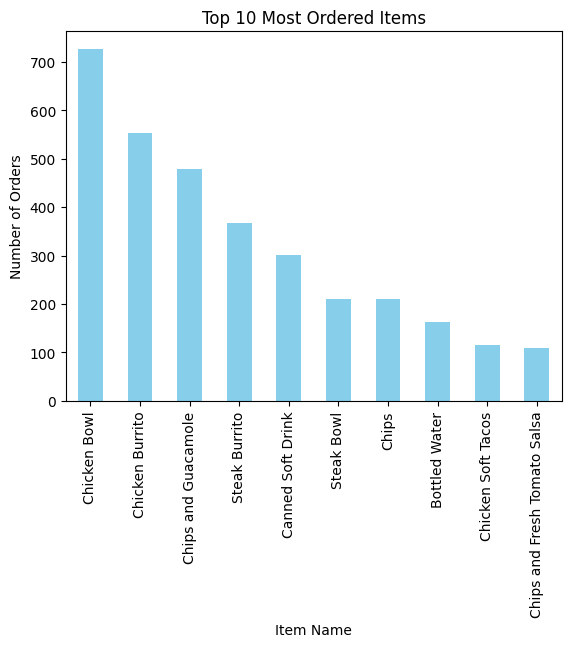

In [ ]:
#Bar chart for top 10 most ordered items:
top_items = data_copy['item_name'].value_counts().head(10)
top_items.plot(kind='bar', color='skyblue')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Ordered Items')
plt.show()

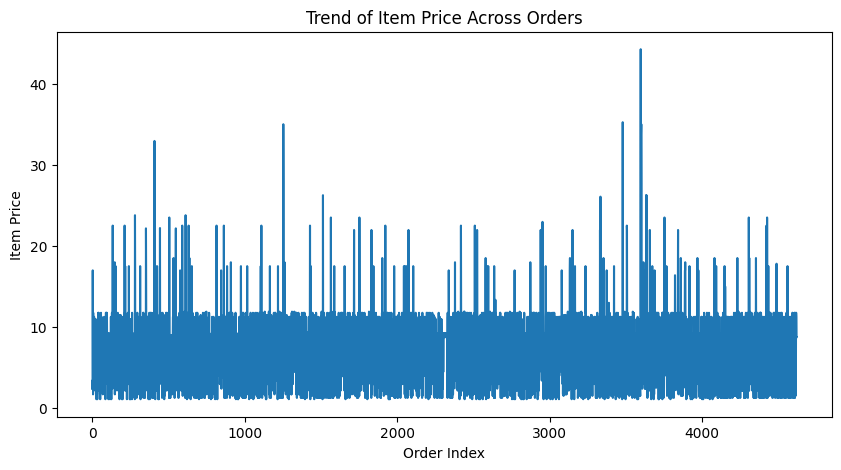

In [ ]:
#Line plot for item_price trend:
data_copy['item_price'].plot(kind='line', figsize=(10, 5))
plt.xlabel('Order Index')
plt.ylabel('Item Price')
plt.title('Trend of Item Price Across Orders')
plt.show()

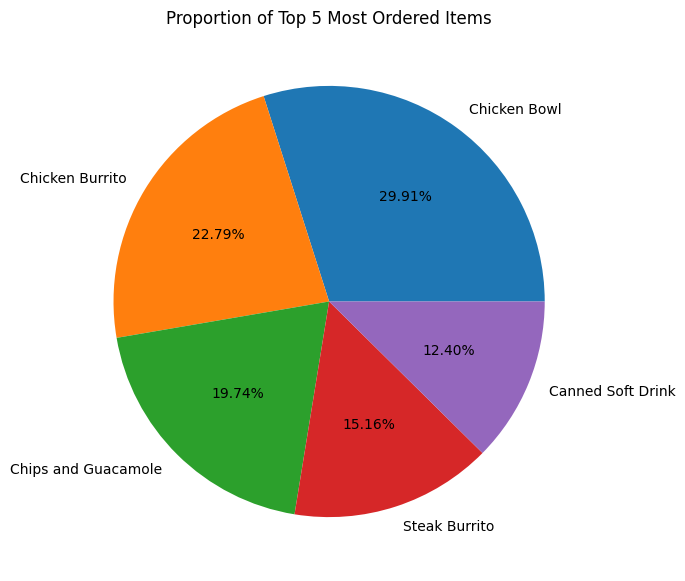

In [27]:
#Pie chart for top 5 most ordered items:
top_5_items = data_copy['item_name'].value_counts().head(5)
top_5_items.plot(kind='pie', autopct='%1.2f%%', figsize=(7, 7))
plt.title('Proportion of Top 5 Most Ordered Items')
plt.ylabel('')
plt.show()

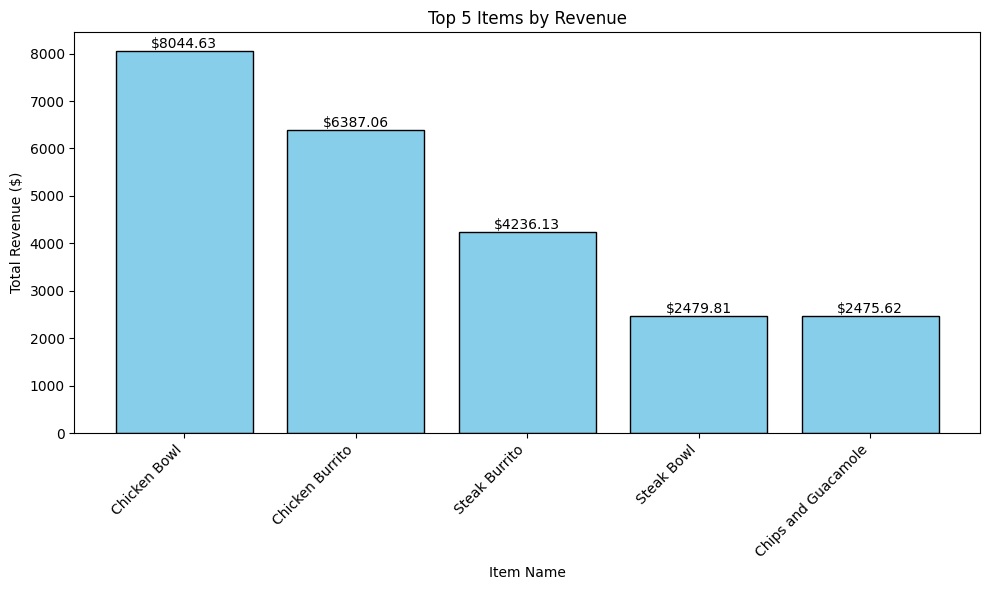

In [7]:

# Convert item_price to float (if not already done)
#data_copy['item_price'] = data_copy['item_price'].str.replace('$', '').astype(float)

# Calculate total revenue for each item
data_copy['total_revenue'] = data_copy['quantity'] * data_copy['item_price']
revenue_by_item = data_copy.groupby('item_name')['total_revenue'].sum().reset_index()

# Sort items by revenue to find the top 5
top_5_items = revenue_by_item.sort_values(by='total_revenue', ascending=False).head(5)

# Plot the histogram for the top 5 items
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_items['item_name'], top_5_items['total_revenue'], color='skyblue', edgecolor='black')

# Add revenue values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}', ha='center', va='bottom')

plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.title('Top 5 Items by Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

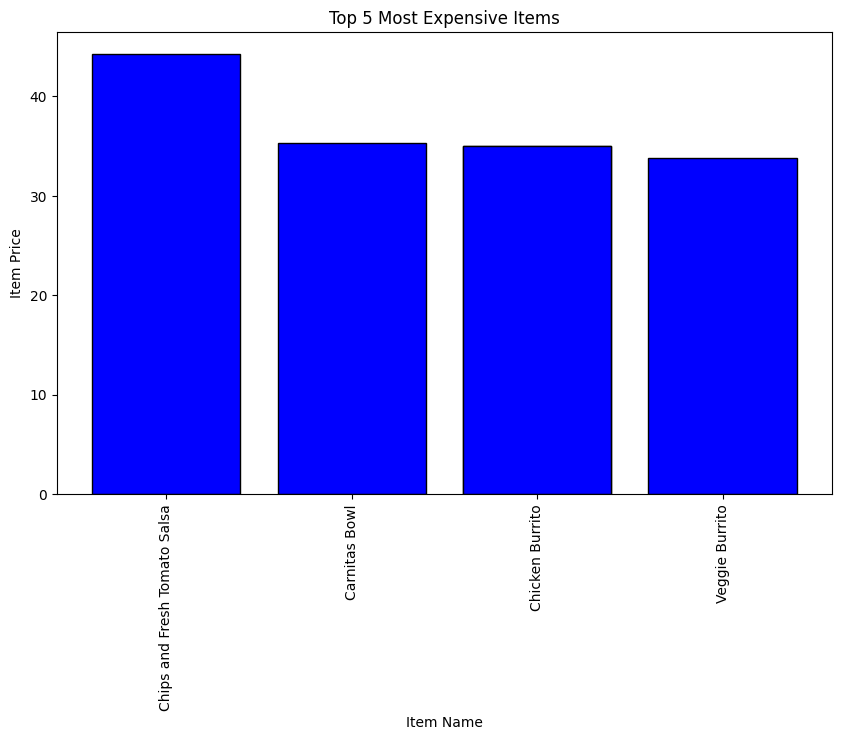

In [11]:
# Convert item_price to float after removing dollar sign
#data_copy['item_price'] = data_copy['item_price'].str.replace('$', '', regex=False).astype(float)

# Get top 5 most expensive items
top5_items = data_copy.nlargest(5, 'item_price')

# Plot histogram for top 5 item names and respective prices
plt.figure(figsize=(10, 6))
plt.bar(top5_items['item_name'], top5_items['item_price'], color='blue', edgecolor='black')
plt.xlabel('Item Name')
plt.ylabel('Item Price')
plt.title('Top 5 Most Expensive Items')
plt.xticks(rotation=90)
plt.show()

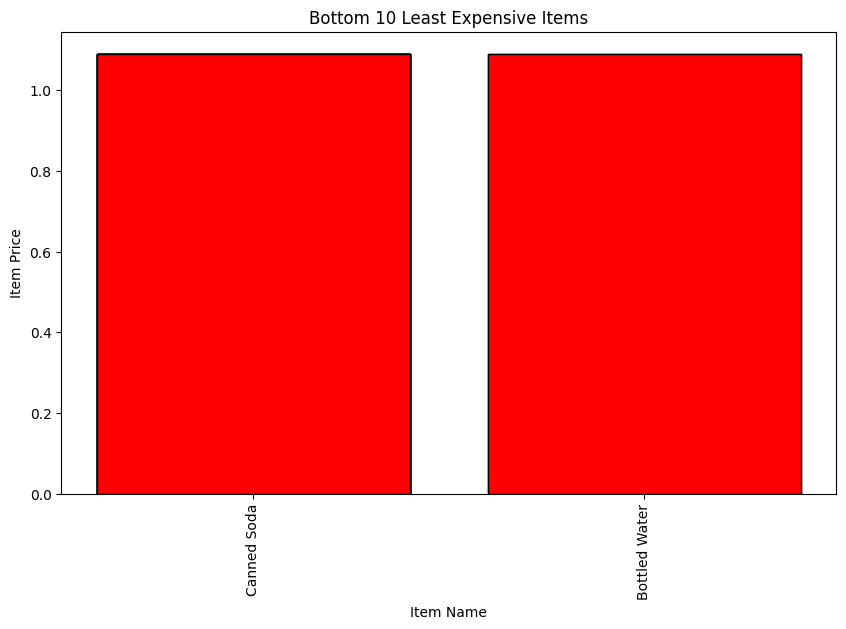

In [13]:
# Get bottom 10 least expensive items
bottom10_items = data_copy.nsmallest(10, 'item_price')

# Plot bar chart for bottom 10 item names and respective prices
plt.figure(figsize=(10, 6))
plt.bar(bottom10_items['item_name'], bottom10_items['item_price'], color='red', edgecolor='black')
plt.xlabel('Item Name')
plt.ylabel('Item Price')
plt.title('Bottom 10 Least Expensive Items')
plt.xticks(rotation=90)
plt.show()

In [14]:
unique_items_count = data_copy['item_name'].nunique()
print("Total number of unique items:", unique_items_count)


Total number of unique items: 50


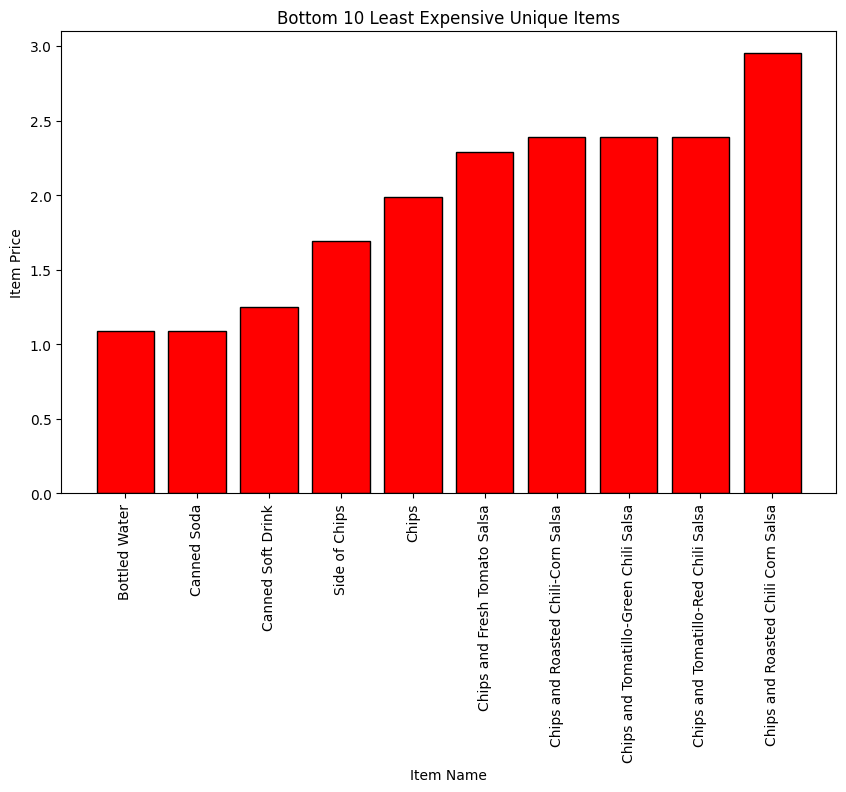

In [15]:
# Get unique item prices and select the 10 lowest-priced unique items
unique_prices = data_copy.groupby('item_name')['item_price'].min().reset_index()
bottom10_unique_items = unique_prices.nsmallest(10, 'item_price')

# Plot bar chart for bottom 10 unique item names and respective prices
plt.figure(figsize=(10, 6))
plt.bar(bottom10_unique_items['item_name'], bottom10_unique_items['item_price'], color='red', edgecolor='black')
plt.xlabel('Item Name')
plt.ylabel('Item Price')
plt.title('Bottom 10 Least Expensive Unique Items')
plt.xticks(rotation=90)
plt.show()


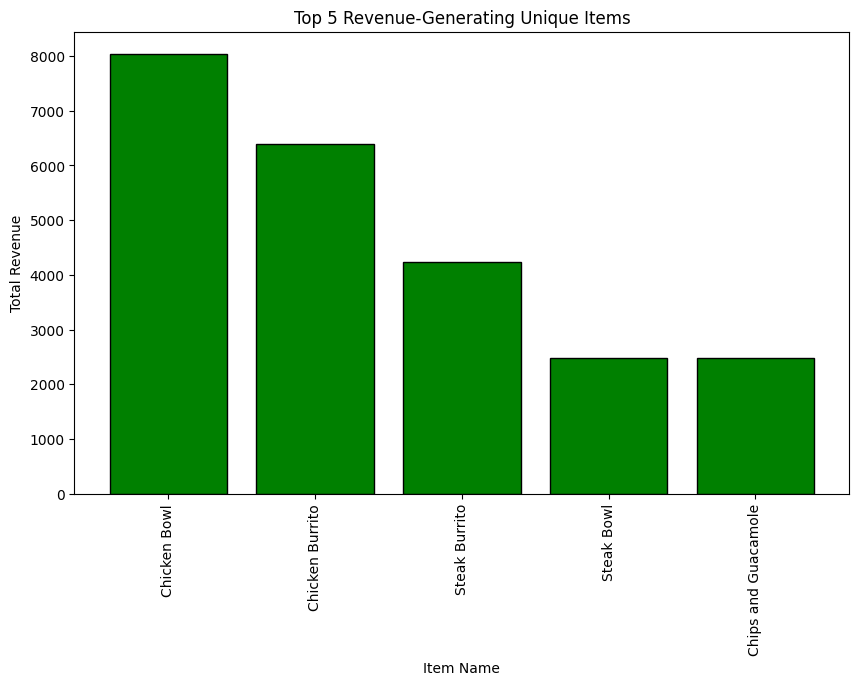

In [16]:
# Calculate total revenue per unique item
data_copy['total_revenue'] = data_copy['quantity'] * data_copy['item_price']
revenue_per_item = data_copy.groupby('item_name')['total_revenue'].sum().reset_index()

# Get top 5 unique products clocking highest revenue
top5_revenue_items = revenue_per_item.nlargest(5, 'total_revenue')

# Plot bar chart for top 5 revenue-generating unique items
plt.figure(figsize=(10, 6))
plt.bar(top5_revenue_items['item_name'], top5_revenue_items['total_revenue'], color='green', edgecolor='black')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue')
plt.title('Top 5 Revenue-Generating Unique Items')
plt.xticks(rotation=90)
plt.show()

In [30]:
#Total revenue generated:
#data_copy['item_price'] = data_copy['item_price'].str.replace('$', '').astype(float)
total_revenue = (data_copy['quantity'] * data_copy['item_price']).sum()
print("Total Revenue:", total_revenue)

Total Revenue: 39237.02


In [31]:
#Total number of items ordered for each item_name:  (use of GroupBy)
item_quantity = data_copy.groupby('item_name')['quantity'].sum()
print("Total Quantity Ordered by Item:")
print(item_quantity)

Total Quantity Ordered by Item:
item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad

In [ ]:
#order with highest total cost
data_copy['total_cost'] = data_copy['quantity'] * data_copy['item_price']
highest_cost_order = data_copy.loc[data_copy['total_cost'].idxmax()]
print("Order with Highest Total Cost:")
print(highest_cost_order)

Order with Highest Total Cost:
order_id                              1443
quantity                                15
item_name     Chips and Fresh Tomato Salsa
item_price                           44.25
total_cost                          663.75
Name: 3598, dtype: object


In [ ]:
#Total cost for each order:
order_total_cost = data_copy.groupby('order_id')['total_cost'].sum()
print("Total Cost for Each Order:")
print(order_total_cost)

Total Cost for Each Order:
order_id
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: total_cost, Length: 1834, dtype: float64


In [ ]:
#Most expensive item:
most_expensive_item = data_copy.loc[data_copy['item_price'].idxmax(), 'item_name']
print("Most Expensive Item:", most_expensive_item)

Most Expensive Item: Chips and Fresh Tomato Salsa


In [ ]:
#Average quantity per order_id:
avg_quantity_per_order = data_copy.groupby('order_id')['quantity'].mean()
print("Average Quantity per Order:")
print(avg_quantity_per_order)

Average Quantity per Order:
order_id
1       1.0
2       2.0
3       1.0
4       1.0
5       1.0
       ... 
1830    1.0
1831    1.0
1832    1.0
1833    1.0
1834    1.0
Name: quantity, Length: 1834, dtype: float64


In [ ]:
#Number of unique customers:
unique_customers = data_copy['order_id'].nunique()
print("Number of Unique Customers:", unique_customers)

Number of Unique Customers: 1834


In [ ]:
#Total revenue by item_name:
revenue_by_item = data_copy.groupby('item_name')['total_cost'].sum()
print("Total Revenue by Item:")
print(revenue_by_item)

Total Revenue by Item:
item_name
6 Pack Soft Drink                         369.93
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     138.71
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             649.18
Bowl                                       74.00
Burrito                                    44.40
Canned Soda                               191.84
Canned Soft Drink                         603.75
Carnitas Bowl                             830.71
Carnitas Burrito                          616.33
Carnitas Crispy Tacos                      95.94
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             8044.63
Chicken Burrito                          6387.06
Chicken Crispy Tacos                

In [ ]:
#Percentage of orders including a specific item (e.g., "Chicken Bowl"):
total_orders = data_copy['order_id'].nunique()
chicken_bowl_orders = data_copy[data_copy['item_name'] == 'Chicken Bowl']['order_id'].nunique()
percentage = (chicken_bowl_orders / total_orders) * 100
print("Percentage of Orders Including Chicken Bowl:", percentage)

Percentage of Orders Including Chicken Bowl: 33.533260632497274


In [ ]:
#Total revenue for each day (assuming order_id represents sequential days):
data_copy['day'] = data_copy['order_id'].astype(int)  # Convert order_id to day
revenue_by_day = data_copy.groupby('day')['total_cost'].sum()
print("Total Revenue by Day:")
print(revenue_by_day)

Total Revenue by Day:
day
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: total_cost, Length: 1834, dtype: float64


Missing values in choice_description: 1246
Top 10 Most Common Customizations:
choice_description
[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]                  36
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                         33
[Lemonade]                                                                            33
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                             29
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                     28
Name: count, 

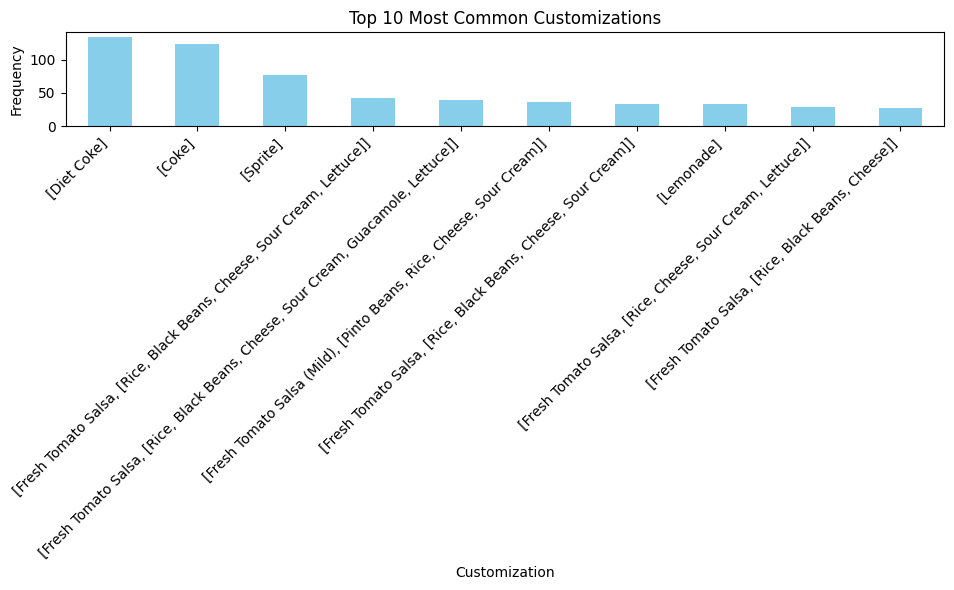

In [28]:
# Check for missing values in the choice_description column
print("Missing values in choice_description:", data['choice_description'].isnull().sum())

# Drop rows where choice_description is NaN (if necessary)
data_cleaned = data.dropna(subset=['choice_description'])

# Analyze the most common customizations
customization_counts = data_cleaned['choice_description'].value_counts().head(10)

print("Top 10 Most Common Customizations:")
print(customization_counts)

# Visualize the results
plt.figure(figsize=(10, 6))
customization_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Customizations')
plt.xlabel('Customization')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
data['price_range'] = pd.cut(data['item_price'], bins=[0, 5, 10, 15, 20], labels=['Low', 'Medium', 'High', 'Premium'])
popular_items_by_price = data.groupby(['price_range', 'item_name'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
print(popular_items_by_price)

    price_range                              item_name  quantity
25          Low                    Chips and Guacamole       455
67       Medium                           Chicken Bowl       422
10          Low                      Canned Soft Drink       351
68       Medium                        Chicken Burrito       343
117        High                           Chicken Bowl       271
..          ...                                    ...       ...
131        High  Chips and Tomatillo-Green Chili Salsa         0
130        High    Chips and Tomatillo Red Chili Salsa         0
129        High  Chips and Tomatillo Green Chili Salsa         0
128        High     Chips and Roasted Chili-Corn Salsa         0
0           Low                      6 Pack Soft Drink         0

[200 rows x 3 columns]


<ipython-input-33-c8ae8a8e59fc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_items_by_price = data.groupby(['price_range', 'item_name'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
